In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('/kaggle/input/fake-news/news.csv', index_col='Unnamed: 0')
df.head(5).T

,8476,10294,3608,10142,875
title,You Can Smell Hillary’s Fear,Watch The Exact Moment Paul Ryan Committed Pol...,Kerry to go to Paris in gesture of sympathy,Bernie supporters on Twitter erupt in anger ag...,The Battle of New York: Why This Primary Matters
text,"Daniel Greenfield, a Shillman Journalism Fello...",Google Pinterest Digg Linkedin Reddit Stumbleu...,U.S. Secretary of State John F. Kerry said Mon...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",It's primary day in New York and front-runners...
label,FAKE,FAKE,REAL,FAKE,REAL


In [4]:
df.value_counts('label')

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [5]:
df['cleaned_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df = df.drop(columns=['text'])
df.head(5).T

,8476,10294,3608,10142,875
title,You Can Smell Hillary’s Fear,Watch The Exact Moment Paul Ryan Committed Pol...,Kerry to go to Paris in gesture of sympathy,Bernie supporters on Twitter erupt in anger ag...,The Battle of New York: Why This Primary Matters
label,FAKE,FAKE,REAL,FAKE,REAL
cleaned_text,"Daniel Greenfield, Shillman Journalism Fellow ...",Google Pinterest Digg Linkedin Reddit Stumbleu...,U.S. Secretary State John F. Kerry said Monday...,"— Kaydee King (@KaydeeKing) November 9, 2016 l...",primary day New York front-runners Hillary Cli...


In [6]:
x = df.drop('label', axis=1)
y = df.label

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_vectorized, y_train)
    predictions = model.predict(X_test_vectorized)

    accuracy = accuracy_score(y_test, predictions)
    print(f'{name} Accuracy: {accuracy:.2f}')

Random Forest Accuracy: 0.91
Support Vector Machine Accuracy: 0.87
Naive Bayes Accuracy: 0.90
Logistic Regression Accuracy: 0.93
k-Nearest Neighbors Accuracy: 0.81


In [9]:
logistic_model = LogisticRegression(C=1.0, random_state=42) 
logistic_model.fit(X_train_vectorized, y_train)

LogisticRegression(random_state=42)

In [10]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_vectorized)
X_test_scaled = scaler.transform(X_test_vectorized)

logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [11]:
logistic_model = LogisticRegression(class_weight='balanced', random_state=42)
logistic_model.fit(X_train_vectorized, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [12]:
logistic_predictions = logistic_model.predict(X_test_vectorized)

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy:.2f}')

print('Logistic Regression Classification Report:')
print(classification_report(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.93
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       628
        REAL       0.93      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



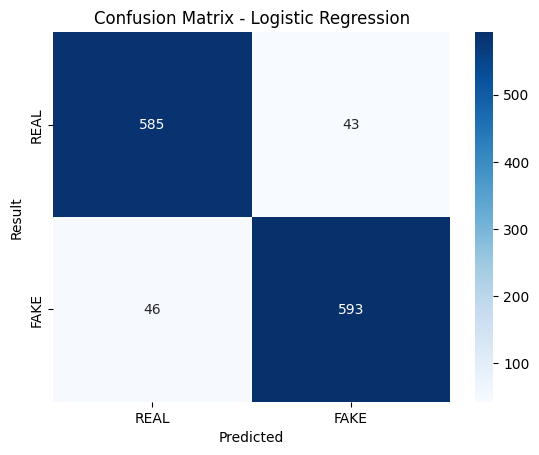

In [13]:
conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Visualizar la matriz de confusión usando seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Predicted')
plt.ylabel('Result')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()